In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


2023-08-23 06:20:39.994574: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step


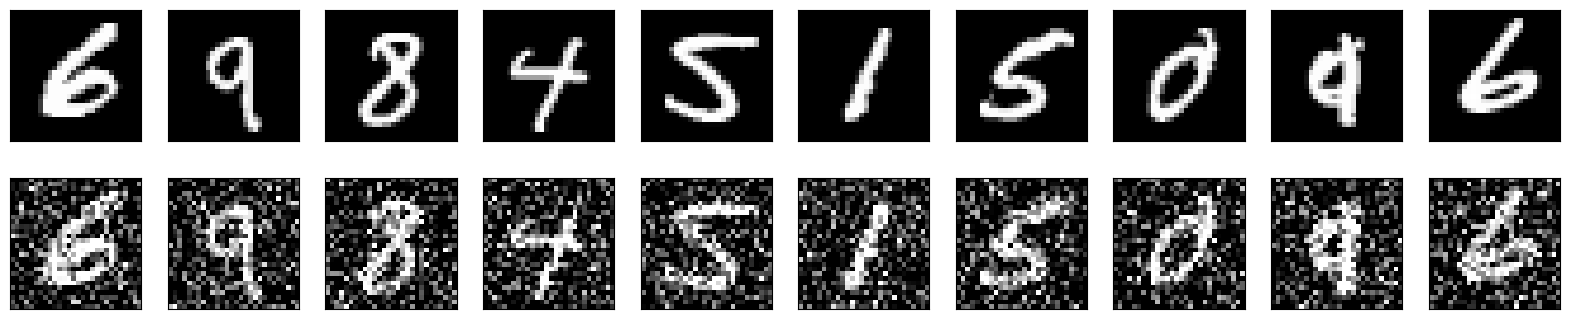

In [2]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [3]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

2023-08-23 06:20:52.066171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38319 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [4]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50


2023-08-23 06:20:56.064266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8903
2023-08-23 06:20:56.521525: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8fed6281d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-23 06:20:56.521590: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2023-08-23 06:20:56.526376: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-23 06:20:56.595371: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-23 06:20:56.661063: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 5s 5ms/step - loss: 0.1266 - val_loss: 0.0724
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0710 - val_loss: 0.0691
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0690 - val_loss: 0.0678
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0679 - val_loss: 0.0671
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0672 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0667 - val_loss: 0.0662
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0663 - val_loss: 0.0656
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0659 - val_loss: 0.0653
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0655 - val_loss: 0.0650
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0652 - val_loss: 0.0647
Epoch 11/5

313/313 [==============================] - 1s 1ms/step


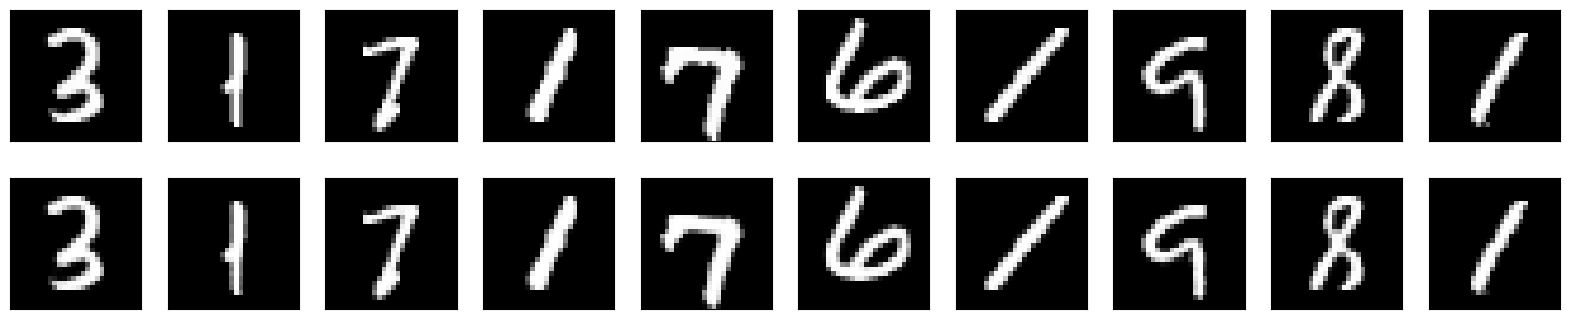

In [5]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [6]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1020 - val_loss: 0.0937
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0929 - val_loss: 0.0912
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0911 - val_loss: 0.0899
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - val_loss: 0.0890
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0893 - val_loss: 0.0886
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - val_loss: 0.0878
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0882 - val_loss: 0.0874
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0878 - val_loss: 0.0873
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0875 - val_loss: 0.0869
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0872 - val_lo

313/313 [==============================] - 0s 920us/step


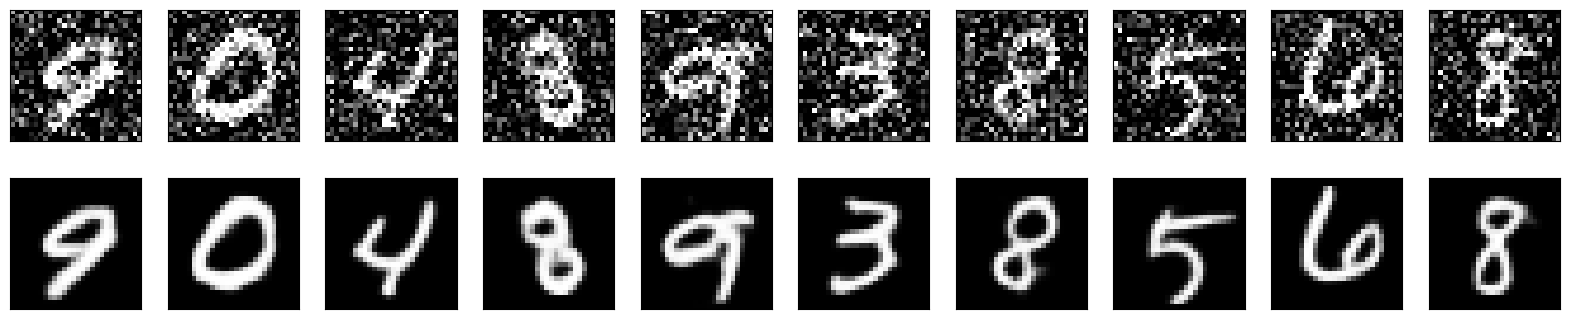

In [7]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)